In [1]:
import numpy as np
a = np.array([0,1,2,3,4,5])

## NumPy Review

NumPy only one data type, so can be rather limited compared to Python list datatypes, but makes up for it in efficiency and processing capabilities. If more than one data type is attempted to be used, NumPy does it's best to coerce them into the singular one that makes the most sense.

In [2]:
a

array([0, 1, 2, 3, 4, 5])

In [3]:
a.ndim

1

In [4]:
a.shape

(6,)

NumPy can be used to reshape data into matrixes

In [5]:
b = a.reshape(3,2)

In [6]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
b.ndim

2

In [8]:
b.shape

(3, 2)

An important consideration is that numPy is optimized, so data is not copied when the above modifications were made. If a value is changed in ```b```, the value is also changed in ```a```. To create a copy a variable, use ```.copy()```

Operations performed on a numPy array are performed on each element in the array, which is in contrast to regular Python lists

In [9]:
c = a.reshape(3,2).copy()
c[0][0] = 66
c

array([[66,  1],
       [ 2,  3],
       [ 4,  5]])

In [10]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [11]:
c*2

array([[132,   2],
       [  4,   6],
       [  8,  10]])

In [12]:
c**2

array([[4356,    1],
       [   4,    9],
       [  16,   25]])

In [13]:
a.clip(0,4)

array([0, 1, 2, 3, 4, 4])

### Null Values
Handling Nonexistant Values can be easiliy done with just a couple of preexisting functions

In [14]:
d = np.array([1,2, np.NAN, 3, 4])
d

array([  1.,   2.,  nan,   3.,   4.])

In [15]:
np.isnan(d)

array([False, False,  True, False, False], dtype=bool)

In [16]:
d[~np.isnan(d)]

array([ 1.,  2.,  3.,  4.])

In [17]:
np.mean(d[~np.isnan(d)])

2.5

### Comparing Runtime

In [18]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',
                number=10000)
naive_np_sec = timeit.timeit('sum(na*na)',
               setup="import numpy as np; na=np.arange(1000)",
               number=10000)
good_np_sec = timeit.timeit('na.dot(na)',
              setup="import numpy as np; na=np.arange(1000)",
              number=10000)

print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 0.932333 sec
Naive NumPy: 0.713388 sec
Good NumPy: 0.012278 sec


## SciPy Review

SciPy is a great companion to NumPy in that in provides support for numerical heavy algorithms on arrays

In [19]:
import scipy as sp

| SciPy packages | Functionalities |
|----------------|-----------------|
| cluster | cluster.hierarchy, vector quantization (k-means (cluster.vq))|
| constants | Physical and mathematical constants, Conversion methods |
| fftpack | Discrete Fourier transform algorithms | 
| integrate | Integration routines | 
| interpolate | Interpolation (linear, cubic, and so on) | 
| io | Data input and output | 
| linalg | Linear algebra routines using the optimized BLAS and LAPACK libraries | 
| ndimage | n-dimensional image package | 
| odr | Orthogonal distance regression | 
| optimize | Optimization (finding minima and roots) | 
| signal | Signal processing | 
| sparse | Sparse matrices | 
| spatial | Spatial data structures and algorithms | 
| special | Special mathematical functions such as Bessel or Jacobian | 
| stats | Statistics toolkit | 

In [20]:
data = sp.genfromtxt('MachineLearningPractice/MachineLearningWithPython/ch01/data/web_traffic.tsv', delimiter='\t')

In [21]:
print(data[:10])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


Two columns of data, each with 743 points of data. These can be split into x and y indexes. x will represent hours, and y will contain the webhits in a particular hour.

In [22]:
x = data[:,0]
y = data[:,1]

In [23]:
sp.sum(sp.isnan(y))

8

By using the ~ operator, we can logically negate an array with itself where it only contains valid values.

In [24]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

In [25]:
sp.sum(sp.isnan(y))

0

In [91]:
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

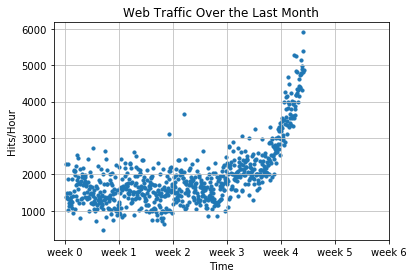

In [56]:
import matplotlib.pyplot as plt

#plot the (x,y) points with dots the size 10
plt.scatter(x,y, s=10)
plt.title('Web Traffic Over the Last Month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])
#plt.autoscale(tight=False)
plt.grid(True, linestyle='-', color='.75')
plt.show()

How long will our server handle the incoming web traffic? To answer this we have
to do the following:
 1. Find the real model behind the noisy data points  (using a linear model as an example)
 2. Following this, use the model to extrapolate into the future to find the point in time where our infrastructure has to be extended.
 
As such there is always some inferiority involved, also called the approximation error. For a learned model function ```f```, the error is calculated as follows:

In [27]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

### Linear Model

In [37]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print('Model parameters: %s' % fp1)
print(residuals)


Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]


In [38]:
f1 = sp.poly1d(fp1)
print(f1)
print("Error:  " + str(error(f1, x, y)))

 
2.596 x + 989
Error:  317389767.34


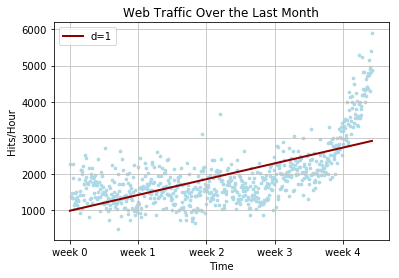

In [57]:
fx = sp.linspace(0,x[-1], 1000)
plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])
plt.plot(fx, f1(fx), linewidth=2, c='darkred')
plt.scatter(x,y, s=7, c='lightblue')
plt.title('Web Traffic Over the Last Month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.grid(True, linestyle='-', color='.75')
plt.legend(['d=%i' % f1.order], loc='upper left')
plt.show()

### Polynominal Model

In [59]:
f2p = sp.polyfit(x, y, 2)
print(f2p)
f2 = sp.poly1d(f2p)
print()
print("Error:  " + str(error(f2, x, y)))

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]

Error:  179983507.878


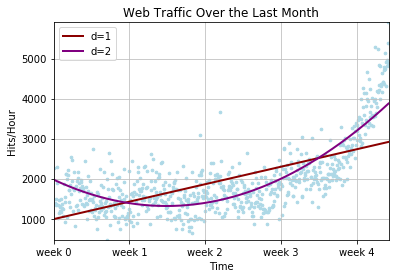

In [75]:
fx2 = sp.linspace(0,x[-1], 1000)

plt.scatter(x,y, s=7, c='lightblue')
plt.title('Web Traffic Over the Last Month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='.75')
plt.plot(fx2, f1(fx2), linewidth=2, c='darkred') # linear
plt.plot(fx2, f2(fx2), linewidth=2, c='purple')  # polynominal
plt.legend(['d=%i' % f1.order, 
            'd=%i' % f2.order], loc='upper left')  # legend
plt.show()


Next, we will increase the complexity and try fitting the fuction with more parameters. We'll try 5, 15, and 75.

In [121]:
f3p = sp.polyfit(x, y, 3)
print(f3p)
f3 = sp.poly1d(f3p)
print()
print("Error:  " + str(error(f3, x, y)))

[  3.04960132e-05  -2.35893797e-02   4.94226019e+00   1.33328797e+03]

Error:  139350144.032


In [62]:
f10p = sp.polyfit(x, y, 10)
print(f10p)
f10 = sp.poly1d(f10p)
print()
print("Error:  " + str(error(f10, x, y)))

[ -3.73981969e-22   1.36473757e-18  -2.14294407e-15   1.89884971e-12
  -1.04570108e-09   3.70867732e-07  -8.45604590e-05   1.19167041e-02
  -9.41618608e-01   3.33703840e+01   1.26421204e+03]

Error:  121942326.364


In [63]:
f75p = sp.polyfit(x, y, 75)
print(f75p)
f75 = sp.poly1d(f75p)
print()
print("Error:  " + str(error(f75, x, y)))

[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000   0.00000000e+000
   0.00000000e+000  -0.00000000e+000   0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000   0.00000000e+000  -6.72751532e-140   1.19705219e-136
  -4.65643328e-135  -4.66511743e-131  -2.54254764e-128   2.26080004e-126
   1.39014544e-122   1.16107890e-119   4.32271828e-117  -1.50769594e-114
  -3.76687190e-111  -3.20555754e-108  -1.48623926e-105   6.30120182e-104
   8.53847125e-100   9.11107899e-097   5.56827546e-094   1.31753163e-091
  -1.52923507e-088  -2.41393865e-085  -1.84983134e-082  -7.30188412e-080
   2.08213549e-077   6.26302641e-074   5.60998891e-071   2.52791244e-068
  -4.42422396e-066  -1.85473396e-062  -1.62945478e-059  -5.76667469e-057
   3.54936673e-054   6.50784469e-051   3.79780207e-

C:\Users\dooki\Anaconda3\envs\py3\lib\site-packages\numpy\lib\polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\dooki\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


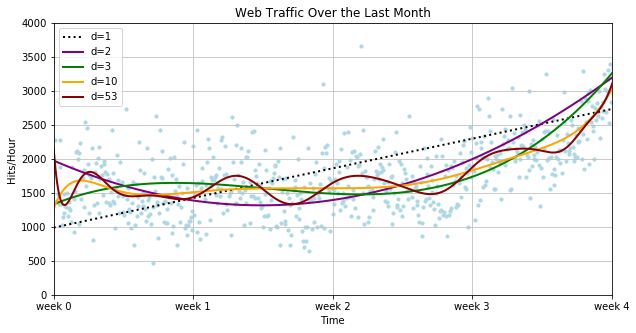

In [122]:
plt.figure(figsize=(10, 5))
plt.title('Web Traffic Over the Last Month')
plt.xlim(xmin=0, xmax=100)
plt.ylim(ymin=0,ymax=4000)
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(5)],
           ['week %i' % w for w in range(5)])
plt.scatter(x,y, s=10, c='lightblue')
plt.grid(True, linestyle='-', color='.75')
fx3 = sp.linspace(0,y[+1], 1000)
plt.plot(fx3, f1(fx3), linewidth=2, linestyle=':', c='black') # linear
plt.plot(fx3, f2(fx3), linewidth=2, c='purple')  # polynominal
plt.plot(fx3, f3(fx3), linewidth=2, c='green')  # polynominal
plt.plot(fx3, f10(fx3), linewidth=2, c='orange')  # polynominal
plt.plot(fx3, f75(fx3), linewidth=2, c='darkred')  # polynominal
plt.legend(['d=%i' % f1.order, 
            'd=%i' % f2.order,
            'd=%i' % f3.order,
            'd=%i' % f10.order,
            'd=%i' % f75.order], loc='upper left')  # legend
plt.show()


### Overfitting and Inflection

As the data gets more and more complex, the data gets better fitted. On the converse, it also begins to pick up more noise in the process, and can be seen in the oscillation of the lines as the number of parameters increases. This phenomena is called overfitting.

The point between under fitting and overfitting appears to have a significant swing somewhere between weeks 3 and 4, called the inflection point.

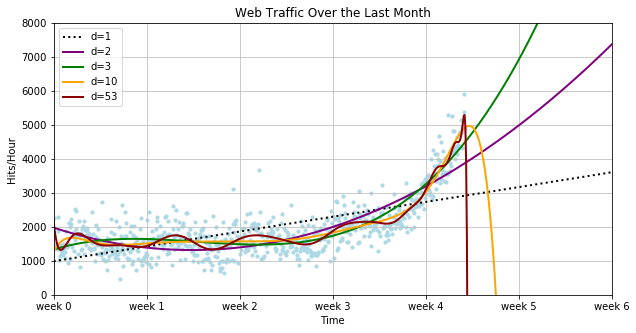

In [123]:
plt.figure(figsize=(10, 5))
plt.title('Web Traffic Over the Last Month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xlim(xmin=0, xmax=100)
plt.ylim(ymin=0,ymax=8000)
plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])
plt.scatter(x,y, s=10, c='lightblue')
plt.grid(True, linestyle='-', color='.75')
fx5 = sp.linspace(0,y[+1], 1000)
plt.plot(fx5, f1(fx5), linewidth=2, linestyle=':', c='black') # linear
plt.plot(fx5, f2(fx5), linewidth=2, c='purple')  # polynominal
plt.plot(fx5, f3(fx5), linewidth=2, c='green')  # polynominal
plt.plot(fx5, f10(fx5), linewidth=2, c='orange')  # polynominal
plt.plot(fx5, f75(fx5), linewidth=2, c='darkred')  # polynominal
plt.legend(['d=%i' % f1.order, 
            'd=%i' % f2.order,
            'd=%i' % f3.order,
            'd=%i' % f10.order,
            'd=%i' % f75.order], loc='upper left')  # legend
plt.show()

The above chart shows the consequences of both overfitting and underfitting, and why it's important to seek a model of best fit when training to fit a dataset.

In [78]:
infl = round(3.5*7*24) #inflection point in hours

xa = x[:infl] #data before inflection point
ya = y[:infl]
xb = x[infl:] #data after inflection point
yb = y[infl:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)

print('Error Inflection:  %f ' % (fa_error + fb_error))


Error Inflection:  132950348.197616 


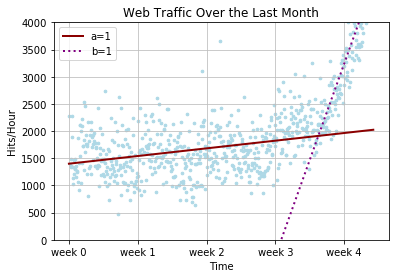

In [124]:
fx4 = sp.linspace(0,x[-1], 1000)

plt.scatter(x,y, s=7, c='lightblue')
plt.ylim(ymin=0, ymax=4000)
plt.title('Web Traffic Over the Last Month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' % w for w in range(10)])
plt.grid(True, linestyle='-', color='.75')
plt.plot(fx4, fa(fx4), linewidth=2, c='darkred') # linear
plt.plot(fx4, fb(fx4), linewidth=2, c='purple', linestyle=':')  # polynominal
plt.legend(['a=%i' % fa.order, 
            'b=%i' % fb.order], loc='upper left')  # legend
plt.show()

Line ```a``` is trained with data from up to week 3, and line ```b``` is trained with data from week 3.5 onward. This seems to give the best at-a-glance fit for the shape of the data.

In [119]:
print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb75 = sp.poly1d(sp.polyfit(xb, yb, 75))


print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb75]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))


Trained only on data after inflection point
Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.813132
Error d=53: 18300711.772512


C:\Users\dooki\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\dooki\Anaconda3\envs\py3\lib\site-packages\numpy\lib\polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\dooki\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


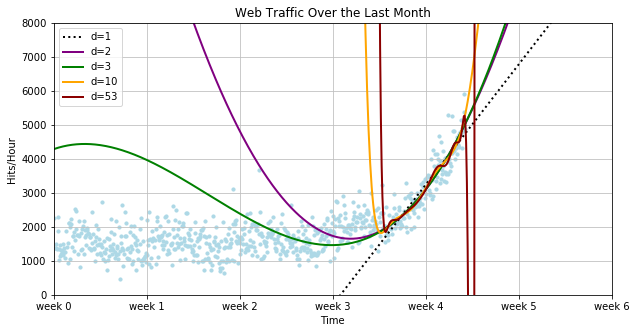

In [120]:
plt.figure(figsize=(10, 5))
plt.xlim(xmin=0, xmax=100)
plt.ylim(ymin=0,ymax=8000)
plt.title('Web Traffic Over the Last Month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])
plt.scatter(x,y, s=10, c='lightblue')
plt.grid(True, linestyle='-', color='.75')
fx6 = sp.linspace(0,y[+1], 1000)
plt.plot(fx6, fb(fx6), linewidth=2, linestyle=':', c='black') # linear
plt.plot(fx6, fb2(fx6), linewidth=2, c='purple')  # polynominal
plt.plot(fx6, fb3(fx6), linewidth=2, c='green')  # polynominal
plt.plot(fx6, fb10(fx6), linewidth=2, c='orange')  # polynominal
plt.plot(fx6, fb75(fx6), linewidth=2, c='darkred')  # polynominal
plt.legend(['d=%i' % fb.order, 
            'd=%i' % fb2.order,
            'd=%i' % fb3.order,
            'd=%i' % fb10.order,
            'd=%i' % fb75.order], loc='upper left')  # legend
plt.show()

### Training and Testing

To help assure that we can more accurately predict the future, a subset of datasets should be preserved as test data, and the rest should be used to train the model. This testing data will help give a control in which to compare the performance of the of the model and simulate future performance.

In [116]:
# separating training from testing data
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt75 = sp.poly1d(sp.polyfit(xb[train], yb[train], 75))


fbt2(x)= 
         2
0.05226 x - 49.21 x + 1.26e+04
fbt2(x)-100,000= 
         2
0.05226 x - 49.21 x - 8.74e+04


C:\Users\dooki\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
C:\Users\dooki\Anaconda3\envs\py3\lib\site-packages\numpy\lib\polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\dooki\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


In [117]:
for f in [fbt1, fbt2, fbt3, fbt10, fbt75]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Error d=1: 8705562.097421
Error d=2: 7308389.117450
Error d=3: 7312916.103533
Error d=10: 7424426.916925
Error d=53: 8386510.934181


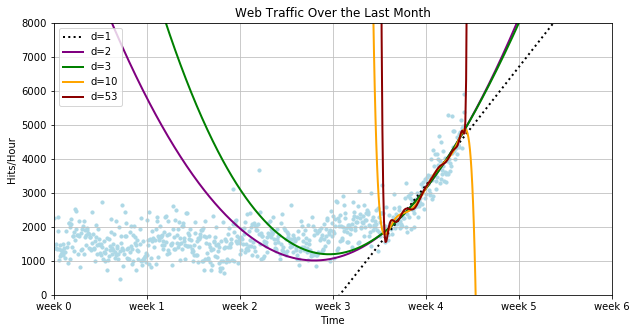

In [118]:
plt.figure(figsize=(10, 5))
plt.xlim(xmin=0, xmax=100)
plt.ylim(ymin=0,ymax=8000)
plt.title('Web Traffic Over the Last Month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])
plt.scatter(x,y, s=10, c='lightblue')
plt.grid(True, linestyle='-', color='.75')
fx7 = sp.linspace(0,y[+1], 1000)
plt.plot(fx7, fbt1(fx7), linewidth=2, linestyle=':', c='black') # linear
plt.plot(fx7, fbt2(fx7), linewidth=2, c='purple')  # polynominal
plt.plot(fx7, fbt3(fx7), linewidth=2, c='green')  # polynominal
plt.plot(fx7, fbt10(fx7), linewidth=2, c='orange')  # polynominal
plt.plot(fx7, fbt75(fx7), linewidth=2, c='darkred')  # polynominal
plt.legend(['d=%i' % fbt1.order, 
            'd=%i' % fbt2.order,
            'd=%i' % fbt3.order,
            'd=%i' % fbt10.order,
            'd=%i' % fbt75.order], loc='upper left')  # legend
plt.show()

In this case, the polynominal of degree 2 edges out as the winner of the fit-off and will move onto the next stage of the process. This task will be figuring out when the infrastructure will be expected to reach 100,000 request per hour. This can be done by utilizing the ```fsolve``` method of the optimize module.

In [125]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])


         2
0.05226 x - 49.21 x + 1.26e+04
         2
0.05226 x - 49.21 x - 8.74e+04
100,000 hits/hour expected at week 10.995270
